# **Telecom X – Parte 2: Predicción de Cancelación (Churn)**

📣 **Historia del Desafío**

¡Felicidades! 🎉 Has sido promovido después de tu excelente desempeño en el análisis exploratorio de la cancelación de clientes en Telecom X. Tu dedicación, claridad al comunicar los datos y visión estratégica marcaron la diferencia.

Ahora, ¡has sido invitado oficialmente a formar parte del equipo de Machine Learning de la empresa!

🎯 **Misión**

Tu nueva misión es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

🧠 **Objetivos del Desafío**

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

🧰 **Lo que vas a practicar**

✅ Preprocesamiento de datos para Machine Learning
✅ Construcción y evaluación de modelos predictivos
✅ Interpretación de resultados y entrega de insights
✅ Comunicación técnica con enfoque estratégico

## **Preparación de los datos**

### **Carga de datos**

In [1]:
url = 'https://raw.githubusercontent.com/HectorCano96/challenge_telecomX_2/refs/heads/main/telecomX_preparado.csv'

In [2]:
# Extracción de datos:

import pandas as pd

datos = pd.read_csv(url)

In [3]:
datos.head(2)

,id_cliente,abandono,genero,adulto_mayor,tiene_pareja,tiene_dependientes,meses_contrato,servicio_telefonico,lineas_multiples,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total,cargo_diario
0,0002-ORFBO,0,mujer,0,1,1,9,1,0,dsl,...,0,1,1,0,un_año,1,cheque_por_correo,65.6,593.3,2.186667
1,0003-MKNFE,0,hombre,0,0,0,9,1,1,dsl,...,0,0,0,1,mes_a_mes,0,cheque_por_correo,59.9,542.4,1.996667


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono                7267 non-null   int64  
 2   genero                  7267 non-null   object 
 3   adulto_mayor            7267 non-null   int64  
 4   tiene_pareja            7267 non-null   int64  
 5   tiene_dependientes      7267 non-null   int64  
 6   meses_contrato          7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   int64  
 8   lineas_multiples        7267 non-null   int64  
 9   tipo_internet           7267 non-null   object 
 10  seguridad_en_linea      7267 non-null   int64  
 11  respaldo_en_linea       7267 non-null   int64  
 12  proteccion_dispositivo  7267 non-null   int64  
 13  soporte_tecnico         7267 non-null   int64  
 14  tv_streaming            7267 non-null   

### **Formateando datos y limpiando columnas innecesarias**

In [5]:
datos = datos.drop(columns='id_cliente')
datos.columns

Index(['abandono', 'genero', 'adulto_mayor', 'tiene_pareja',
       'tiene_dependientes', 'meses_contrato', 'servicio_telefonico',
       'lineas_multiples', 'tipo_internet', 'seguridad_en_linea',
       'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico',
       'tv_streaming', 'peliculas_streaming', 'tipo_contrato',
       'factura_electronica', 'metodo_pago', 'cargo_mensual', 'cargo_total',
       'cargo_diario'],
      dtype='object')

In [6]:
for col in datos.select_dtypes(include="object"):
    print(f"\nColumna: {col}")
    print(datos[col].unique())


Columna: genero
['mujer' 'hombre']

Columna: tipo_internet
['dsl' 'fibra_optica' 'sin_internet']

Columna: tipo_contrato
['un_año' 'mes_a_mes' 'dos_años']

Columna: metodo_pago
['cheque_por_correo' 'cheque_electronico' 'tarjeta_credito_automatica'
 'transferencia_bancaria_automatica']


In [7]:
import pandas as pd

# Transformaciones a enteros
datos["genero"] = datos["genero"].map({"hombre": 0, "mujer": 1})

datos["tipo_internet"] = datos["tipo_internet"].map({
    "sin_internet": 0,
    "dsl": 1,
    "fibra_optica": 2
})

datos["tipo_contrato"] = datos["tipo_contrato"].map({
    "mes_a_mes": 0,
    "un_año": 1,
    "dos_años": 2
})

datos["metodo_pago"] = datos["metodo_pago"].map({
    "cheque_por_correo": 0,
    "cheque_electronico": 1,
    "tarjeta_credito_automatica": 2,
    "transferencia_bancaria_automatica": 3
})

In [8]:
datos.head()

,abandono,genero,adulto_mayor,tiene_pareja,tiene_dependientes,meses_contrato,servicio_telefonico,lineas_multiples,tipo_internet,seguridad_en_linea,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total,cargo_diario
0,0,1,0,1,1,9,1,0,1,0,...,0,1,1,0,1,1,0,65.6,593.30,2.186667
1,0,0,0,0,0,9,1,1,1,0,...,0,0,0,1,0,0,0,59.9,542.40,1.996667
2,1,0,0,0,0,4,1,0,2,0,...,1,0,0,0,0,1,1,73.9,280.85,2.463333
3,1,0,1,1,0,13,1,0,2,0,...,1,0,1,1,0,1,1,98.0,1237.85,3.266667
4,1,1,1,1,0,3,1,0,2,0,...,0,1,1,0,0,1,0,83.9,267.40,2.796667


In [9]:
# Identificar las variables categóricas:

categoricas = ["genero", "tipo_internet", "tipo_contrato", "metodo_pago"]

### **Encoding**

In [11]:
# Aplicar One-Hot Encoding con pandas.get_dummies:
import pandas as pd

# One-Hot Encoding
datos_encoded = pd.get_dummies(
    datos,
    columns=categoricas,
    drop_first=True  # elimina la primera categoría para evitar multicolinealidad
)

print(datos_encoded.head())
print(datos_encoded.shape)

   abandono  adulto_mayor  tiene_pareja  tiene_dependientes  meses_contrato  \
0         0             0             1                   1               9   
1         0             0             0                   0               9   
2         1             0             0                   0               4   
3         1             1             1                   0              13   
4         1             1             1                   0               3   

   servicio_telefonico  lineas_multiples  seguridad_en_linea  \
0                    1                 0                   0   
1                    1                 1                   0   
2                    1                 0                   0   
3                    1                 0                   0   
4                    1                 0                   0   

   respaldo_en_linea  proteccion_dispositivo  ...  cargo_total  cargo_diario  \
0                  1                       0  ...       593.

In [12]:
datos.head()

,abandono,genero,adulto_mayor,tiene_pareja,tiene_dependientes,meses_contrato,servicio_telefonico,lineas_multiples,tipo_internet,seguridad_en_linea,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total,cargo_diario
0,0,1,0,1,1,9,1,0,1,0,...,0,1,1,0,1,1,0,65.6,593.30,2.186667
1,0,0,0,0,0,9,1,1,1,0,...,0,0,0,1,0,0,0,59.9,542.40,1.996667
2,1,0,0,0,0,4,1,0,2,0,...,1,0,0,0,0,1,1,73.9,280.85,2.463333
3,1,0,1,1,0,13,1,0,2,0,...,1,0,1,1,0,1,1,98.0,1237.85,3.266667
4,1,1,1,1,0,3,1,0,2,0,...,0,1,1,0,0,1,0,83.9,267.40,2.796667


### **Verificación de la Proporción de Cancelación (Churn)**

In [14]:
# Conteo de clases:

# Conteo absoluto
conteo = datos["abandono"].value_counts()
print(conteo)

abandono
0    5398
1    1869
Name: count, dtype: int64


In [16]:
# Proporción relativa:
# Proporción en porcentaje
proporcion = datos["abandono"].value_counts(normalize=True) * 100
print(proporcion)

abandono
0    74.280996
1    25.719004
Name: proportion, dtype: float64


/tmp/ipython-input-1604623529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="abandono", data=datos, palette="viridis")


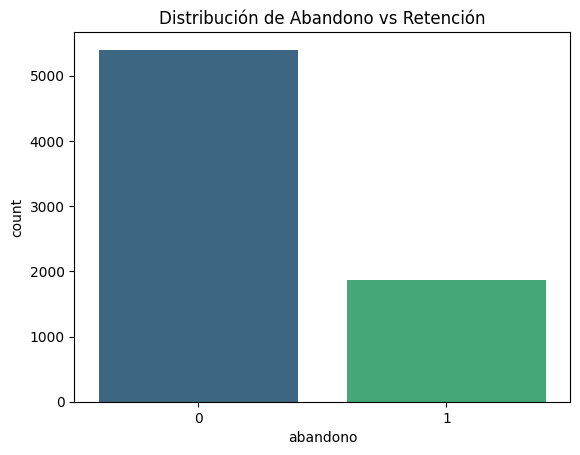

In [18]:
# Visualizando:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="abandono", data=datos, palette="viridis")
plt.title("Distribución de Abandono vs Retención")
plt.show()

### **Balanceo de Clases**

In [20]:
# Revisando desbalance de clases:

conteo_abandono = datos["abandono"].value_counts()
proporcion_abandono = datos["abandono"].value_counts(normalize=True) * 100

print("Conteo de Abandono:\n", conteo_abandono)
print("\nProporción de Abandono (%):\n", proporcion_abandono.round(2))

Conteo de Abandono:
 abandono
0    5398
1    1869
Name: count, dtype: int64

Proporción de Abandono (%):
 abandono
0    74.28
1    25.72
Name: proportion, dtype: float64


In [22]:
# Separando varaibles predictoras y target:

from sklearn.model_selection import train_test_split

# Separar features y target
X = datos.drop(columns="abandono")
y = datos["abandono"]

# Train-test split (para no contaminar el test con técnicas de balanceo)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [23]:
# Aplicando método SMOTE:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Distribución tras SMOTE:")
print(y_train_smote.value_counts())

Distribución tras SMOTE:
abandono
0    4318
1    4318
Name: count, dtype: int64


### **Normalización y estandarización**

In [24]:
# Normalización y estandarización de datos:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir datos
X = datos.drop("abandono", axis=1)
y = datos["abandono"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Dataset para árboles (sin escalar)
X_train_tree, X_test_tree = X_train.copy(), X_test.copy()

# Dataset estandarizado
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## **Análisis de datos**

### **Anáslisis de correlación**

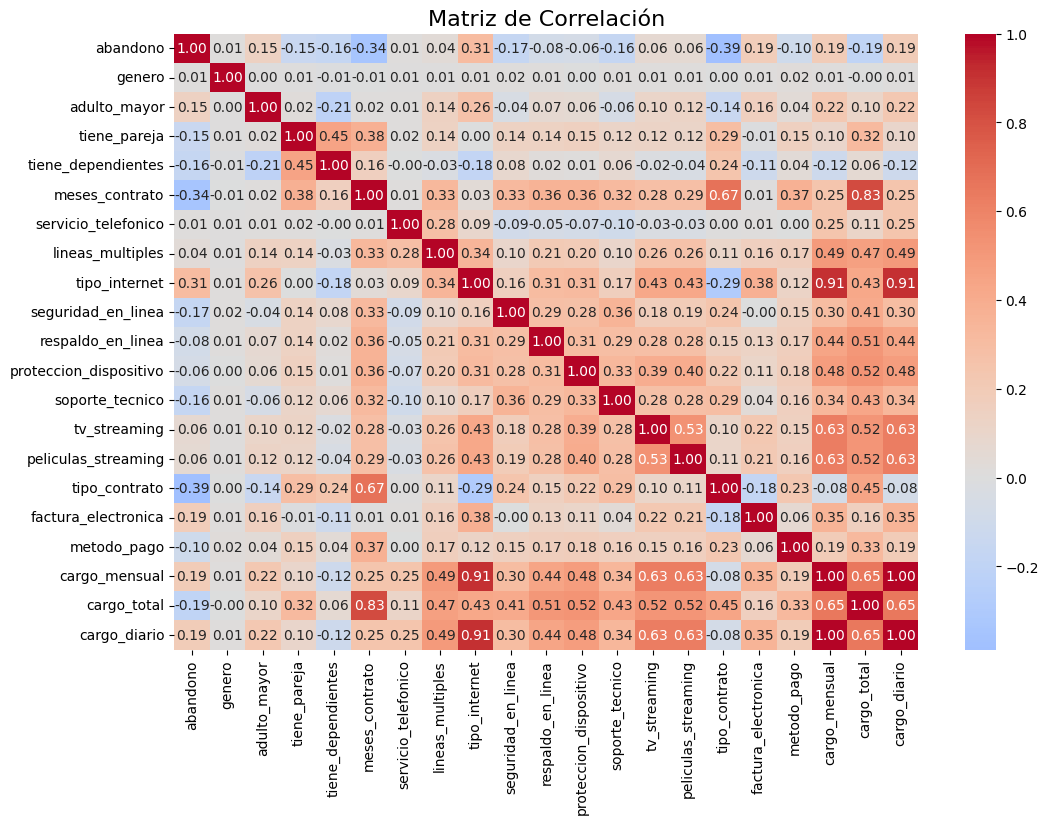

Correlación de cada variable con 'abandono':

abandono                  1.000000
tipo_internet             0.310110
cargo_diario              0.189866
cargo_mensual             0.189866
factura_electronica       0.186666
adulto_mayor              0.146733
tv_streaming              0.062430
peliculas_streaming       0.060586
lineas_multiples          0.039343
servicio_telefonico       0.012571
genero                    0.009555
proteccion_dispositivo   -0.063452
respaldo_en_linea        -0.080163
metodo_pago              -0.103922
tiene_pareja             -0.148546
soporte_tecnico          -0.160440
tiene_dependientes       -0.161384
seguridad_en_linea       -0.166828
cargo_total              -0.193345
meses_contrato           -0.344079
tipo_contrato            -0.387433
Name: abandono, dtype: float64


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de correlación
corr = datos.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de Correlación", fontsize=16)
plt.show()

# Correlación específica con 'abandono'
corr_abandono = corr["abandono"].sort_values(ascending=False)
print("Correlación de cada variable con 'abandono':\n")
print(corr_abandono)

### **Análisis Dirigido**

/tmp/ipython-input-343836184.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="abandono", y="meses_contrato", data=datos, palette="viridis")


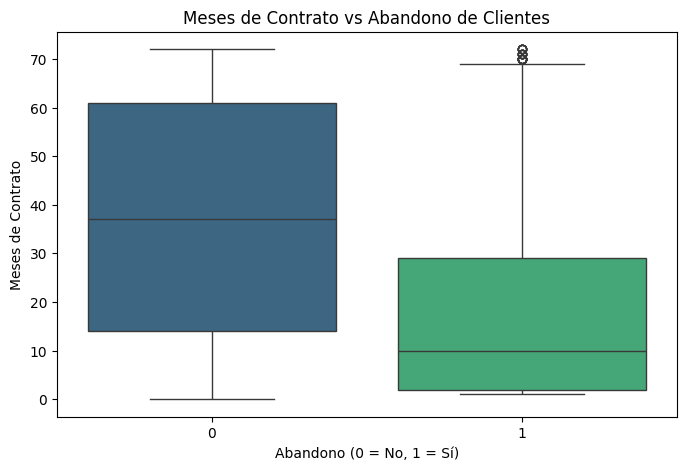

In [27]:
# Tiempo de contrato × Cancelación

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x="abandono", y="meses_contrato", data=datos, palette="viridis")
plt.title("Meses de Contrato vs Abandono de Clientes")
plt.xlabel("Abandono (0 = No, 1 = Sí)")
plt.ylabel("Meses de Contrato")
plt.show()

/tmp/ipython-input-2926247268.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="abandono", y="cargo_total", data=datos, palette="viridis")


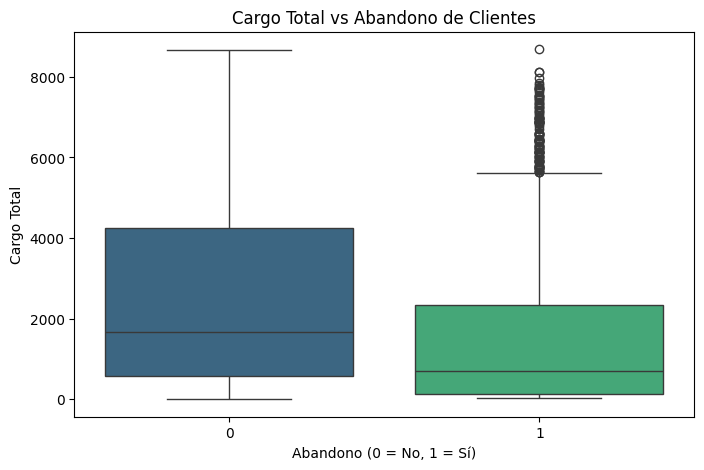

In [29]:
# Gasto total x cancelación:

plt.figure(figsize=(8,5))
sns.boxplot(x="abandono", y="cargo_total", data=datos, palette="viridis")
plt.title("Cargo Total vs Abandono de Clientes")
plt.xlabel("Abandono (0 = No, 1 = Sí)")
plt.ylabel("Cargo Total")
plt.show()

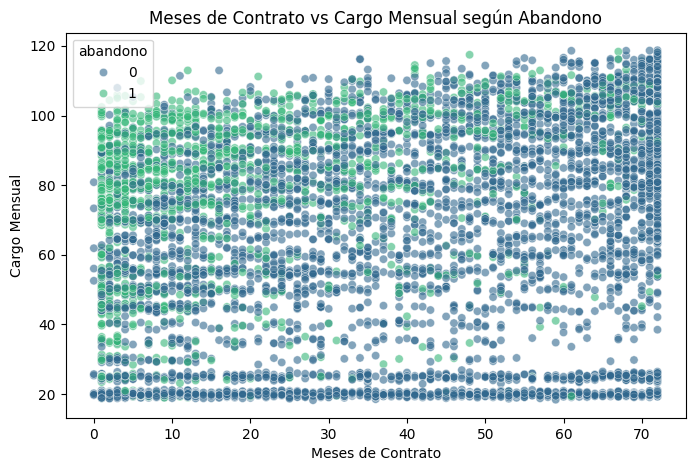

In [30]:
# Gasto mensual x tiempo de contrato:

plt.figure(figsize=(8,5))
sns.scatterplot(x="meses_contrato", y="cargo_mensual", hue="abandono", data=datos, palette="viridis", alpha=0.6)
plt.title("Meses de Contrato vs Cargo Mensual según Abandono")
plt.xlabel("Meses de Contrato")
plt.ylabel("Cargo Mensual")
plt.show()

In [37]:
# Tabla de contingencia: tipo de contrato vs abandono
tabla_contrato = pd.crosstab(
    datos["tipo_contrato"],
    datos["abandono"],
    normalize="index"
)*100

# Renombrar columnas
tabla_contrato = tabla_contrato.rename(
    columns={0: "Permanecen", 1: "Cancelan"}
)

# Si ya está numérico, convierto a string legible:
tabla_contrato = tabla_contrato.rename_axis("Tipo de Contrato").rename(
    index={0: "Mes a Mes", 1: "Un Año", 2: "Dos Años"}
)

print("📊 Proporción de abandono por tipo de contrato:\n")
print(tabla_contrato.round(2))

📊 Proporción de abandono por tipo de contrato:

abandono          Permanecen  Cancelan
Tipo de Contrato                      
Mes a Mes              58.68     41.32
Un Año                 89.07     10.93
Dos Años               97.25      2.75


## **Modelo Predictivo**

### **Separación de Datos**

In [38]:
from sklearn.model_selection import train_test_split

# Variables predictoras (todas menos "abandono")
X = datos.drop(columns="abandono")

# Variable objetivo (abandono)
y = datos["abandono"]

# División 80% entrenamiento - 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% para prueba
    stratify=y,          # mantiene la misma proporción de churn en train/test
    random_state=42      # para reproducibilidad
)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)
print("\nDistribución en y_train:\n", y_train.value_counts(normalize=True).round(2))
print("\nDistribución en y_test:\n", y_test.value_counts(normalize=True).round(2))

Tamaño de entrenamiento: (5813, 20)
Tamaño de prueba: (1454, 20)

Distribución en y_train:
 abandono
0    0.74
1    0.26
Name: proportion, dtype: float64

Distribución en y_test:
 abandono
0    0.74
1    0.26
Name: proportion, dtype: float64


### **Creación de Modelos**

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# ----------------------
# Modelo 1: Regresión Logística (datos normalizados)
# ----------------------
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced")
log_reg.fit(X_train_std, y_train)

y_pred_log = log_reg.predict(X_test_std)
y_prob_log = log_reg.predict_proba(X_test_std)[:,1]

print("🔹 Modelo 1: Regresión Logística")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))
print("\n")

# ----------------------
# Modelo 2: Random Forest (sin normalización)
# ----------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train_tree, y_train)

y_pred_rf = rf.predict(X_test_tree)
y_prob_rf = rf.predict_proba(X_test_tree)[:,1]

print("🔹 Modelo 2: Random Forest")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

🔹 Modelo 1: Regresión Logística
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1080
           1       0.50      0.82      0.62       374

    accuracy                           0.75      1454
   macro avg       0.71      0.77      0.72      1454
weighted avg       0.81      0.75      0.76      1454

ROC-AUC: 0.8440569914834621


🔹 Modelo 2: Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1080
           1       0.59      0.45      0.51       374

    accuracy                           0.78      1454
   macro avg       0.71      0.67      0.69      1454
weighted avg       0.76      0.78      0.77      1454

ROC-AUC: 0.8162185581303228


### **Evaluación de los Modelos**

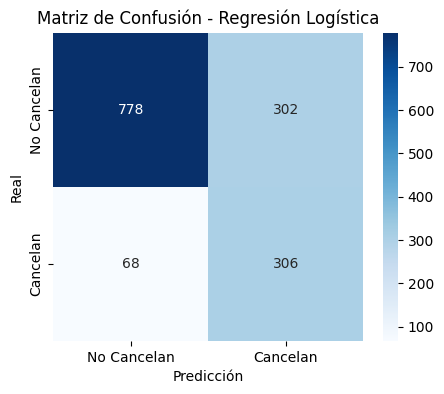

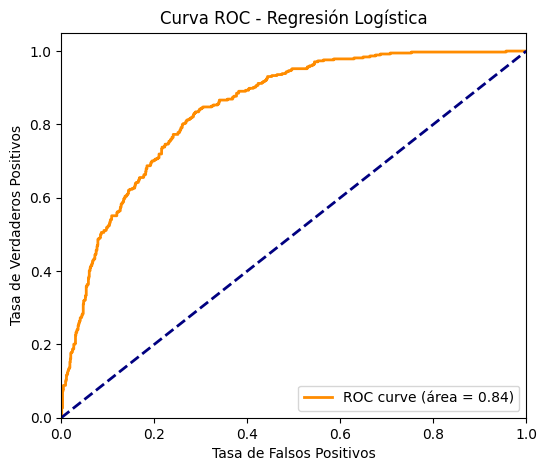

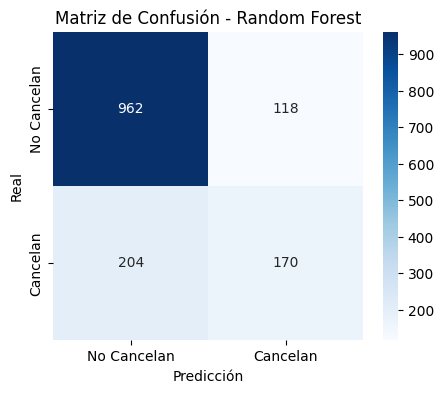

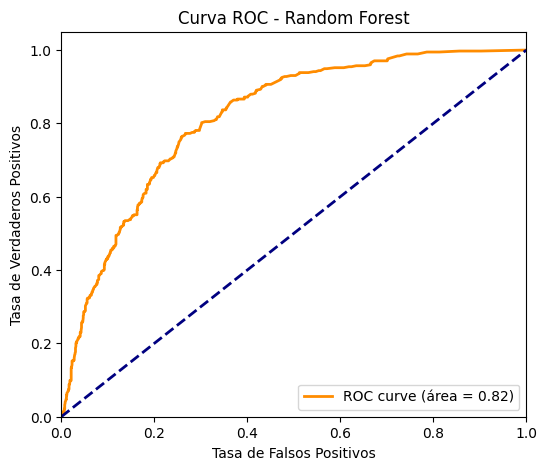

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

def evaluar_modelo(y_true, y_pred, y_prob, modelo_nombre):
    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["No Cancelan","Cancelan"],
                yticklabels=["No Cancelan","Cancelan"])
    plt.title(f"Matriz de Confusión - {modelo_nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color="darkorange", lw=2,
             label=f"ROC curve (área = {roc_auc:.2f})")
    plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("Tasa de Falsos Positivos")
    plt.ylabel("Tasa de Verdaderos Positivos")
    plt.title(f"Curva ROC - {modelo_nombre}")
    plt.legend(loc="lower right")
    plt.show()

# Evaluar modelos
evaluar_modelo(y_test, y_pred_log, y_prob_log, "Regresión Logística")
evaluar_modelo(y_test, y_pred_rf, y_prob_rf, "Random Forest")

📊 Importancia de variables en Random Forest:

               Variable  Importancia
18          cargo_total     0.158823
4        meses_contrato     0.141006
17        cargo_mensual     0.136298
19         cargo_diario     0.134970
14        tipo_contrato     0.117484
7         tipo_internet     0.050617
16          metodo_pago     0.045186
15  factura_electronica     0.024081
0                genero     0.022763
11      soporte_tecnico     0.021592
8    seguridad_en_linea     0.019600
2          tiene_pareja     0.019248
3    tiene_dependientes     0.016706
9     respaldo_en_linea     0.016488
1          adulto_mayor     0.016282


/tmp/ipython-input-2017454362.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importancia", y="Variable", data=importancias.head(15), palette="viridis")


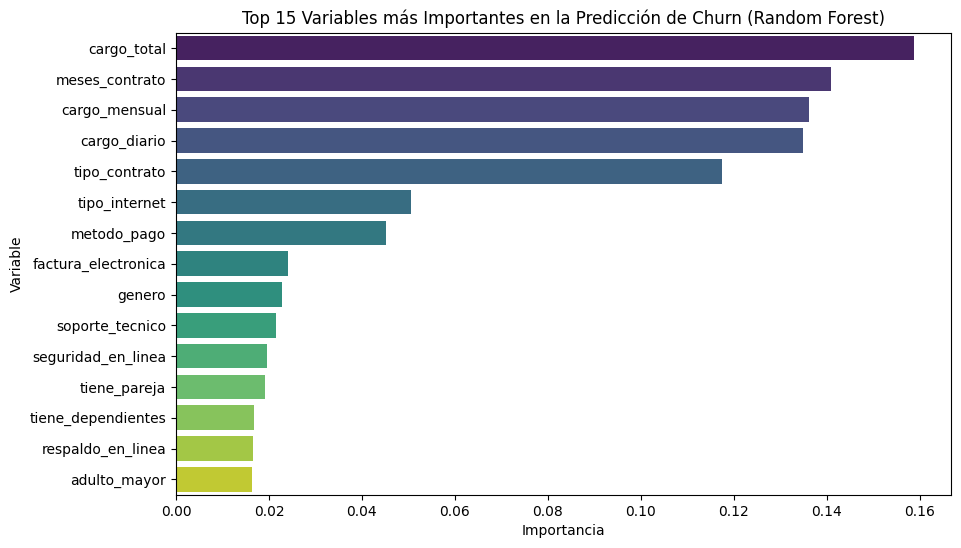

In [41]:
# Importancia de variables:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importancia de variables
importancias = pd.DataFrame({
    "Variable": X_train_tree.columns,
    "Importancia": rf.feature_importances_
})

# Ordenar de mayor a menor
importancias = importancias.sort_values(by="Importancia", ascending=False)

# Mostrar tabla
print("📊 Importancia de variables en Random Forest:\n")
print(importancias.head(15))  # Top 15

# Visualización
plt.figure(figsize=(10,6))
sns.barplot(x="Importancia", y="Variable", data=importancias.head(15), palette="viridis")
plt.title("Top 15 Variables más Importantes en la Predicción de Churn (Random Forest)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

📊 Coeficientes de la Regresión Logística (impacto en churn):

                  Variable  Coeficiente
7            tipo_internet     1.131699
18             cargo_total     0.563124
12            tv_streaming     0.232658
13     peliculas_streaming     0.219859
15     factura_electronica     0.190427
6         lineas_multiples     0.152640
1             adulto_mayor     0.094868
10  proteccion_dispositivo     0.065707
0                   genero     0.037632
5      servicio_telefonico    -0.006791
2             tiene_pareja    -0.009183
9        respaldo_en_linea    -0.015419
16             metodo_pago    -0.046424
3       tiene_dependientes    -0.057817
8       seguridad_en_linea    -0.089047
                  Variable  Coeficiente
6         lineas_multiples     0.152640
1             adulto_mayor     0.094868
10  proteccion_dispositivo     0.065707
0                   genero     0.037632
5      servicio_telefonico    -0.006791
2             tiene_pareja    -0.009183
9        respaldo_

/tmp/ipython-input-1794464376.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coeficiente", y="Variable", data=coeficientes, palette="coolwarm")


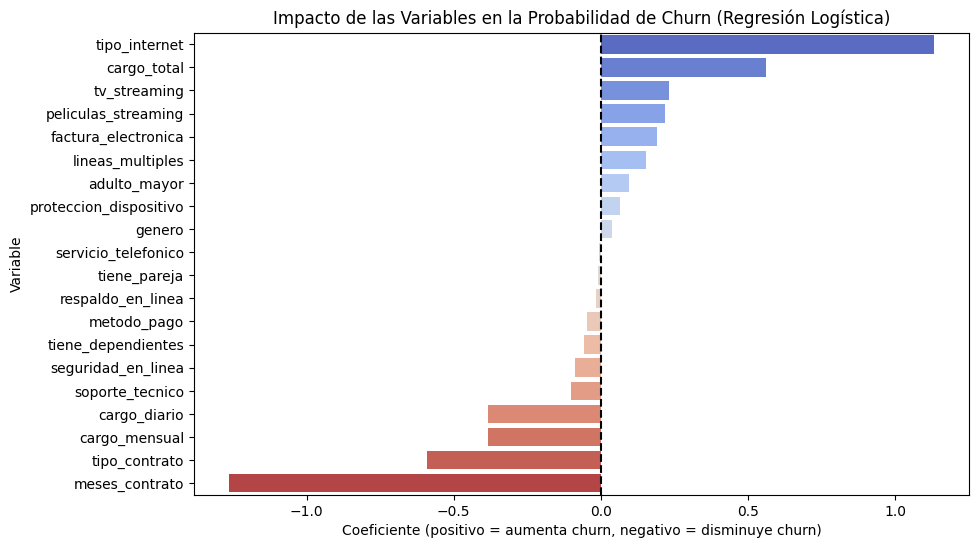

In [42]:
# interpretar coeficientes de Regresión Logística

# Obtener coeficientes
coeficientes = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": log_reg.coef_[0]
})

# Ordenar por impacto
coeficientes = coeficientes.sort_values(by="Coeficiente", ascending=False)

# Mostrar tabla
print("📊 Coeficientes de la Regresión Logística (impacto en churn):\n")
print(coeficientes.head(15))   # top positivos
print(coeficientes.tail(15))   # top negativos

# Visualización
plt.figure(figsize=(10,6))
sns.barplot(x="Coeficiente", y="Variable", data=coeficientes, palette="coolwarm")
plt.axvline(0, color="black", linestyle="--")
plt.title("Impacto de las Variables en la Probabilidad de Churn (Regresión Logística)")
plt.xlabel("Coeficiente (positivo = aumenta churn, negativo = disminuye churn)")
plt.ylabel("Variable")
plt.show()

### **Evaluación, Comparación y Ajuste de los Modelos**

Hemos entrenado y evaluado dos modelos: Regresión Logística y Random Forest. A continuación, analizamos su rendimiento basándonos en las métricas obtenidas y las visualizaciones:

### Regresión Logística

*   **Métricas:**
    *   Precisión (clase 1 - Abandono): 0.50
    *   Recall (clase 1 - Abandono): 0.82
    *   F1-score (clase 1 - Abandono): 0.62
    *   Accuracy: 0.75
    *   ROC-AUC: 0.84

*   **Matriz de Confusión:** Muestra que el modelo identifica correctamente un número significativo de clientes que cancelan (Verdaderos Positivos = 306), aunque también tiene un número considerable de Falsos Positivos (clientes que predice que cancelarán pero no lo hacen = 302). Tiene pocos Falsos Negativos (clientes que cancelan pero predice que no = 68).

*   **Curva ROC:** El área bajo la curva (AUC) de 0.84 indica una buena capacidad del modelo para distinguir entre las clases positiva y negativa.

### Random Forest

*   **Métricas:**
    *   Precisión (clase 1 - Abandono): 0.59
    *   Recall (clase 1 - Abandono): 0.45
    *   F1-score (clase 1 - Abandono): 0.51
    *   Accuracy: 0.78
    *   ROC-AUC: 0.82

*   **Matriz de Confusión:** Este modelo tiene menos Falsos Positivos (118) que la Regresión Logística, pero muchos más Falsos Negativos (204). Identifica menos clientes que cancelan en comparación con la Regresión Logística.

*   **Curva ROC:** El AUC de 0.82 es ligeramente inferior al de la Regresión Logística.

### Análisis Crítico y Comparación

*   **Mejor Desempeño:** La **Regresión Logística** parece tener un mejor desempeño general para este problema, especialmente si el objetivo principal es identificar la mayor cantidad posible de clientes que van a cancelar (alto Recall para la clase 1), incluso si esto implica una mayor tasa de Falsos Positivos. Su ROC-AUC también es ligeramente superior. El Random Forest, aunque tiene mayor precisión para la clase 1 y mayor precisión global, no es tan efectivo identificando a los clientes que cancelan (bajo Recall para la clase 1).

*   **Overfitting/Underfitting:**
    *   Ambos modelos muestran una diferencia entre su accuracy global y el F1-score para la clase minoritaria (abandono), lo cual es común en datasets desbalanceados.
    *   El Random Forest tiene una precisión para la clase 0 (No Cancelan) de 0.83 y recall de 0.89, mientras que para la clase 1 (Cancelan) tiene precisión de 0.59 y recall de 0.45. Esta diferencia podría sugerir que el modelo se desempeña mejor en la clase mayoritaria, lo que es esperado con datos desbalanceados, pero no necesariamente indica overfitting a menos que el rendimiento en el conjunto de entrenamiento sea significativamente mayor que en el conjunto de prueba. Sin embargo, dado el bajo recall para la clase minoritaria, podría estar subajustando para identificar a los clientes que cancelan.
    *   La Regresión Logística con `class_weight="balanced"` ha logrado un recall mucho mayor para la clase 1 (0.82), sacrificando precisión (0.50). Esto indica que está siendo más sensible a la clase minoritaria, lo cual es positivo para identificar posibles abandonos, pero también genera más falsas alarmas. No parece haber overfitting evidente basándonos solo en estas métricas de prueba.

*   **Consideraciones y Ajustes:**
    *   Para la Regresión Logística, el alto número de Falsos Positivos podría ser una preocupación en un contexto de negocio (costo de contactar a clientes que no iban a cancelar). Se podría ajustar el umbral de clasificación para encontrar un mejor balance entre Precisión y Recall si es necesario.
    *   Para el Random Forest, a pesar de usar `class_weight="balanced"`, el recall para la clase 1 es bajo. Se podrían explorar otras técnicas de balanceo (como SMOTE aplicado antes del entrenamiento) o ajustar los hiperparámetros del Random Forest (ej. `min_samples_leaf`, `min_samples_split`) para intentar mejorar la detección de la clase minoritaria. Sin embargo, ya aplicamos SMOTE en un paso anterior, y los resultados de la Regresión Logística con datos normalizados y `class_weight='balanced'` fueron mejores en términos de Recall y ROC-AUC.

En resumen, la Regresión Logística con balance de clases incorporado parece ser un punto de partida más prometedor para este problema de detección de abandono debido a su mayor capacidad para identificar clientes que realmente cancelarán (mayor recall y ROC-AUC). Sin embargo, la elección final dependerá de los costos asociados a los Falsos Positivos y Falsos Negativos desde la perspectiva del negocio.

Umbral donde la precisión es más cercana al recall: 0.6956

🔹 Regresión Logística con Umbral Ajustado:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1080
           1       0.60      0.60      0.60       374

    accuracy                           0.80      1454
   macro avg       0.73      0.73      0.73      1454
weighted avg       0.80      0.80      0.80      1454

ROC-AUC: 0.8440569914834621


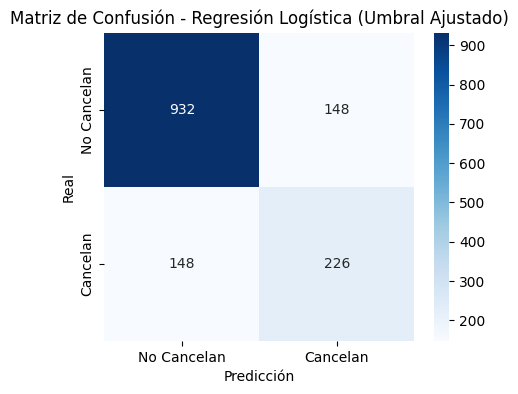

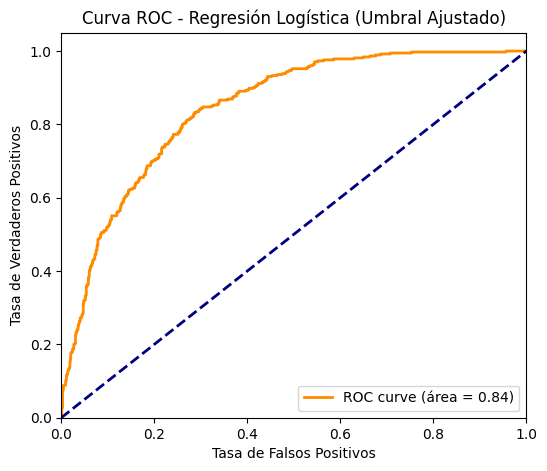

In [46]:
from sklearn.metrics import precision_recall_curve, auc
import numpy as np

# Ajustando el umbral para Regresión Logística
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_log)

# Encontrar el umbral que da un buen balance (ej. donde precision es cercana a recall)
# O elegir un umbral basado en las necesidades del negocio (ej. priorizar recall sobre precision)

# Encontramos el umbral donde la precisión es más cercana al recall
i = np.argmin(np.abs(precision - recall))
optimal_threshold = thresholds[i]

print(f"Umbral donde la precisión es más cercana al recall: {optimal_threshold:.4f}")

# Evaluar con el nuevo umbral
y_pred_log_adjusted = (y_prob_log >= optimal_threshold).astype(int)

print("\n🔹 Regresión Logística con Umbral Ajustado:")
print(classification_report(y_test, y_pred_log_adjusted))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log)) # El ROC-AUC no cambia con el umbral

# Visualizar la matriz de confusión ajustada
evaluar_modelo(y_test, y_pred_log_adjusted, y_prob_log, "Regresión Logística (Umbral Ajustado)")

In [47]:
# Compare classification reports
print("Original Regresión Logística:")
print(classification_report(y_test, y_pred_log))
print("\nRegresión Logística con Umbral Ajustado:")
print(classification_report(y_test, y_pred_log_adjusted))

# Compare confusion matrices
cm_original = confusion_matrix(y_test, y_pred_log)
cm_adjusted = confusion_matrix(y_test, y_pred_log_adjusted)

print("\nMatriz de Confusión Original:")
print(cm_original)
print("\nMatriz de Confusión con Umbral Ajustado:")
print(cm_adjusted)

print("\nAnálisis del impacto del ajuste del umbral:")
print(f"Umbral original (default > 0.5): Precision (Churn) = {cm_original[1,1] / (cm_original[1,1] + cm_original[0,1]):.2f}, Recall (Churn) = {cm_original[1,1] / (cm_original[1,1] + cm_original[1,0]):.2f}")
print(f"Umbral ajustado (> {optimal_threshold:.4f}): Precision (Churn) = {cm_adjusted[1,1] / (cm_adjusted[1,1] + cm_adjusted[0,1]):.2f}, Recall (Churn) = {cm_adjusted[1,1] / (cm_adjusted[1,1] + cm_adjusted[1,0]):.2f}")

Original Regresión Logística:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1080
           1       0.50      0.82      0.62       374

    accuracy                           0.75      1454
   macro avg       0.71      0.77      0.72      1454
weighted avg       0.81      0.75      0.76      1454


Regresión Logística con Umbral Ajustado:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1080
           1       0.60      0.60      0.60       374

    accuracy                           0.80      1454
   macro avg       0.73      0.73      0.73      1454
weighted avg       0.80      0.80      0.80      1454


Matriz de Confusión Original:
[[778 302]
 [ 68 306]]

Matriz de Confusión con Umbral Ajustado:
[[932 148]
 [148 226]]

Análisis del impacto del ajuste del umbral:
Umbral original (default > 0.5): Precision (Churn) = 0.50, Recall (Churn) = 0.82
Umbral ajustado (> 0.6956): P

### Evaluación de Modelos Predictivos y Ajuste de Umbral

#### 🔹 Comparación de Modelos

| Métrica        | Regresión Logística | Random Forest |
|----------------|---------------------|----------------|
| Accuracy       | 0.75                | 0.78           |
| Precisión (1)  | 0.50                | 0.59           |
| Recall (1)     | 0.82                | 0.45           |
| F1 Score (1)   | 0.62                | 0.51           |
| ROC-AUC        | 0.84                | 0.82           |

Ambos modelos muestran buen desempeño general (ROC-AUC > 0.80), pero con enfoques distintos:

- **Regresión Logística** prioriza el recall, detectando a la mayoría de los clientes que cancelan, aunque con más falsos positivos.
- **Random Forest** prioriza la precisión, acertando más cuando predice cancelación, pero dejando escapar muchos casos reales de abandono.

#### 🔍 Análisis Crítico

- **Trade-off entre Recall y Precisión**  
  La logística es más útil si la empresa quiere prevenir pérdidas, incluso a costa de sobrealertar.  
  Random Forest es mejor si se quiere evitar falsas alarmas, aunque se pierdan clientes valiosos.

- **Balance de Métricas**  
  La logística favorece la detección de churn.  
  Random Forest reduce falsas alarmas, pero sacrifica recall.

- **Diagnóstico de Ajuste**  
  - *Random Forest*: Buen desempeño en clase 0, pero bajo recall en clase 1 → posible underfitting.  
    Recomendación: ajustar hiperparámetros (n_estimators, max_depth, etc.) o aplicar SMOTE.
  - *Regresión Logística*: Buen recall y ROC-AUC → no presenta overfitting ni underfitting grave.  
    Recomendación: ajustar el umbral de decisión para mejorar precisión.

---

### 🎯 Ajuste del Umbral en Regresión Logística

#### 🔹 Comparación de Métricas

| Métrica        | Umbral 0.5 | Umbral 0.6956 |
|----------------|------------|---------------|
| Precisión (1)  | 0.50       | 0.60          |
| Recall (1)     | 0.82       | 0.60          |
| F1 Score (1)   | 0.62       | 0.60          |
| Accuracy       | 0.75       | 0.80          |

#### 🔹 Matriz de Confusión

|                | Predicho No Cancelan | Predicho Cancelan |
|----------------|----------------------|--------------------|
| **Real No**    | 778 → 932            | 302 → 148          |
| **Real Sí**    | 68 → 148             | 306 → 226          |

#### 🔍 Impacto del Ajuste

- **Precisión aumentó**: Menos falsas alarmas.
- **Recall disminuyó**: Se escapan más clientes que sí cancelan.
- **F1-score se estabiliza**: El balance entre precisión y recall se ajusta.
- **Accuracy mejora**: Pero no debe ser la única métrica considerada.

#### 📌 Interpretación Estratégica

> Ajustar el umbral de decisión a 0.6956 desplaza el enfoque del modelo:  
> De detectar la mayoría de los abandonos → a asegurar que las predicciones de abandono sean correctas.

La elección del umbral óptimo depende del costo relativo de falsos positivos vs. falsos negativos. Si el costo de perder un cliente es alto, conviene mantener un umbral más bajo para maximizar el recall.

---

### ✅ Conclusión Estratégica y Estrategias de Retención

#### 🔍 Principales Impulsores de la Cancelación

- **Tipo y Tiempo de Contrato**: Contratos mes a mes y menor antigüedad aumentan el riesgo de abandono.
- **Servicios de Internet y Adicionales**: Fibra óptica y ausencia de servicios extra se asocian con mayor churn.
- **Cargos Mensuales vs. Totales**: Cargos mensuales altos correlacionan con abandono; cargos totales altos con retención.
- **Factura Electrónica y Método de Pago**: Factura electrónica y ciertos métodos de pago se relacionan con mayor churn.
- **Adultos Mayores**: Ligeramente más propensos a cancelar, aunque con menor impacto.

#### 📊 Evaluación Comparativa de Modelos

- **Regresión Logística**: Buen balance entre precisión y recall con umbral ajustado. Alta interpretabilidad.
- **Random Forest**: Mayor precisión, menor recall. Captura relaciones no lineales.

> Si el objetivo es detectar la mayor cantidad de clientes en riesgo, se recomienda usar Regresión Logística con umbral por defecto o más bajo.

#### 🎯 Estrategias de Retención Sugeridas

- Incentivar contratos a largo plazo.
- Mejorar soporte técnico y servicios adicionales.
- Ofrecer revisiones de tarifas a clientes con cargos altos.
- Optimizar experiencia de facturación y métodos de pago.
- Diseñar programas específicos para segmentos de alto riesgo.

#### 🔄 Acciones que recomendamos:

- Validar el modelo en nuevos datos.
- Implementar pruebas A/B de estrategias de retención.
- Probar modelos avanzados como XGBoost o LightGBM.
- Realizar análisis cualitativo en segmentos críticos (ej. clientes de fibra óptica).


## **Interpretación y Conclusiones**

### Análisis de Variables Relevantes para la Predicción de Cancelación

Basándonos en los modelos de Regresión Logística y Random Forest entrenados, analizamos a continuación la importancia de las variables para predecir la cancelación de clientes:

### Regresión Logística: Análisis de Coeficientes

En la Regresión Logística, los coeficientes indican la dirección y magnitud del impacto de cada variable en la probabilidad de cancelación (churn). Un coeficiente positivo significa que un aumento en el valor de la variable aumenta la probabilidad de cancelación, mientras que un coeficiente negativo indica que aumenta la probabilidad de retención.

Observando los coeficientes (mostrados en la tabla y gráfico anteriores):

*   **Variables con mayor impacto positivo (aumentan el churn):**
    *   `tipo_internet` (especialmente fibra óptica)
    *   `cargo_total`
    *   `tv_streaming` y `peliculas_streaming`
    *   `factura_electronica`

*   **Variables con mayor impacto negativo (disminuyen el churn / aumentan retención):**
    *   `meses_contrato` (mayor antigüedad)
    *   `tipo_contrato` (contratos a largo plazo)
    *   `cargo_mensual` y `cargo_diario` (aunque `cargo_total` tiene impacto opuesto, esto puede indicar que clientes con altos cargos mensuales pero bajo cargo total son más propensos a cancelar, quizás al inicio del contrato)
    *   `soporte_tecnico`
    *   `seguridad_en_linea`, `tiene_dependientes`, `tiene_pareja`

Estos coeficientes nos dan una idea lineal de cómo cada factor influye en la decisión de cancelar.

### Random Forest: Análisis de Importancia de Variables

El Random Forest calcula la importancia de una variable basándose en cuánto reduce la impureza (por ejemplo, la entropía o el índice Gini) en los nodos donde se utiliza para dividir los datos. Las variables con mayor importancia son aquellas que más contribuyen a crear divisiones más "puras" en los árboles, es decir, que separan mejor las clases de clientes que cancelan y los que no.

Observando la tabla y gráfico de importancia de variables (mostrados anteriormente):

*   **Variables más importantes:**
    *   `cargo_total`
    *   `meses_contrato`
    *   `cargo_mensual`
    *   `cargo_diario`
    *   `tipo_contrato`
    *   `tipo_internet`
    *   `metodo_pago`

Las variables relacionadas con los cargos (`cargo_total`, `cargo_mensual`, `cargo_diario`), el tiempo y tipo de contrato (`meses_contrato`, `tipo_contrato`), y el tipo de internet (`tipo_internet`) son consistentemente identificadas como las más relevantes por ambos modelos. Esto sugiere que los aspectos económicos y la duración de la relación con la empresa son factores clave en la decisión de cancelación.

### Síntesis y Conclusiones sobre la Relevancia de Variables

Ambos modelos coinciden en que las variables relacionadas con los **aspectos financieros** (cargos) y la **duración/tipo de contrato** son los predictores más fuertes de la cancelación.

*   Los **clientes con contratos cortos y poca antigüedad**, especialmente si tienen **altos cargos mensuales** (que aún no se reflejan en un alto cargo total), tienen una mayor propensión a cancelar.
*   El **tipo de servicio de internet** también es relevante, con la fibra óptica asociada a mayor churn.
*   La presencia de **servicios adicionales** como soporte técnico, seguridad en línea, respaldo en línea, así como tener **pareja o dependientes**, y contratos a largo plazo, están asociados a una **menor probabilidad de cancelación**.

Esta información es crucial para diseñar estrategias de retención dirigidas, enfocándose en los segmentos de clientes con mayor riesgo identificados por estas variables.

### Informe Final: Predicción de Cancelación (Churn) en Telecom X

#### Resumen Ejecutivo

Este informe documenta el proceso de modelado predictivo para identificar clientes con alto riesgo de cancelación en Telecom X. A través de la ingesta de datos, preprocesamiento, análisis exploratorio y la implementación de modelos de clasificación (Regresión Logística y Random Forest), hemos logrado desarrollar un *pipeline* analítico capaz de señalar los principales impulsores del *churn*. Los hallazgos cuantitativos derivados de las métricas de evaluación y la interpretabilidad de los modelos proporcionan una base sólida para la toma de decisiones estratégicas orientadas a la retención de clientes.

#### Análisis de Datos y Factores Clave de Cancelación

El análisis exploratorio inicial reveló un desbalance significativo en la variable objetivo (`abandono`), con aproximadamente un 25.7% de clientes que cancelaron. Para abordar esto en la etapa de modelado, se consideraron técnicas como `class_weight='balanced'` en los algoritmos.

El análisis de correlación y la evaluación de la importancia de las variables a través de los coeficientes de la Regresión Logística y la importancia de características del Random Forest convergieron en la identificación de los siguientes factores como los más relevantes para la predicción del *churn*:

*   **Compromiso Contractual (`meses_contrato`, `tipo_contrato`):** Existe una clara relación inversa entre la duración del contrato y la antigüedad del cliente con la probabilidad de cancelación. Los clientes con contratos a corto plazo (mes a mes) y menor tiempo de servicio presentan un riesgo significativamente mayor.
*   **Variables Financieras (`cargo_mensual`, `cargo_total`, `cargo_diario`):** Los cargos mensuales elevados son un fuerte predictor de *churn*, lo que sugiere que los clientes pueden percibir un bajo valor por el precio pagado, especialmente en las etapas iniciales de su contrato. La correlación negativa del `cargo_total` con el *churn* indica que la longevidad y la acumulación de gasto total se asocian con la lealtad.
*   **Servicios de Internet (`tipo_internet`) y Adicionales:** El tipo de conexión a internet, particularmente la fibra óptica, se asocia con un mayor riesgo de cancelación. La ausencia de servicios de valor añadido como seguridad en línea, respaldo, protección de dispositivo y soporte técnico también incrementa la propensión al *churn*. Esto subraya la importancia de una oferta de servicios robusta y la percepción de seguridad y asistencia.
*   **Comportamiento y Demografía (`factura_electronica`, `metodo_pago`, `adulto_mayor`, `tiene_pareja`, `tiene_dependientes`):** La preferencia por factura electrónica y ciertos métodos de pago también influyen. Demográficamente, los adultos mayores muestran una ligera mayor propensión a cancelar, mientras que tener pareja o dependientes parece ser un factor estabilizador.

#### Evaluación y Comparación de Modelos Predictivos

Se implementaron y evaluaron dos modelos de clasificación: Regresión Logística y Random Forest, utilizando métricas estándar para problemas de clasificación desbalanceada (Precisión, Recall, F1-score, ROC-AUC) y visualizaciones (Matriz de Confusión, Curva ROC).

*   **Regresión Logística:** Este modelo, entrenado con datos estandarizados y `class_weight='balanced'`, demostró un Recall superior para la clase minoritaria (abandono = 0.82 con umbral por defecto), lo cual es crucial para identificar la mayor cantidad posible de clientes en riesgo. Su ROC-AUC de 0.84 indica una buena capacidad discriminatoria. El ajuste del umbral de clasificación permitió encontrar un punto de operación (umbral = 0.6956) que equilibra Precisión (0.60) y Recall (0.60), aumentando la *accuracy* general a 0.80.
*   **Random Forest:** Aunque logró una *accuracy* global ligeramente mayor (0.78) y una mejor Precisión para la clase mayoritaria, su Recall para la clase de abandono (0.45) fue inferior. El ROC-AUC de 0.82 es comparable al de la Regresión Logística.

Desde una perspectiva de ciencia de datos, la Regresión Logística, especialmente con el umbral ajustado, ofrece un balance favorable entre la capacidad de detección de *churn* (Recall) y la fiabilidad de las predicciones positivas (Precisión), además de ser altamente interpretable, lo cual facilita la comunicación de los hallazgos a las partes interesadas del negocio.

#### Conclusión Estratégica y Estrategias de Retención

El análisis de datos y el modelado predictivo confirman que la **duración del contrato, los aspectos financieros (cargos) y los servicios adicionales** son los predictores más potentes del *churn* en Telecom X. Los clientes con contratos cortos, altos cargos mensuales y que no utilizan servicios de valor añadido representan el segmento de mayor riesgo.

Basándose en estos hallazgos cuantitativos, se proponen las siguientes estrategias de retención con un enfoque basado en datos:

1.  **Programas de Incentivos para Contratos a Largo Plazo:** Diseñar ofertas personalizadas para clientes con contratos mes a mes, incentivando la migración a planes de mayor duración mediante descuentos progresivos o beneficios exclusivos.
2.  **Optimización de la Estructura de Precios:** Realizar un análisis más profundo de la relación entre `cargo_mensual` y *churn*, identificando umbrales de riesgo y desarrollando estrategias de precios o paquetes de servicios que mejoren la percepción de valor, especialmente para nuevos clientes o aquellos con planes de alto costo.
3.  **Mejora de la Experiencia con Fibra Óptica:** Realizar un análisis de causa raíz de la alta tasa de *churn* en este segmento. Implementar mejoras técnicas, fortalecer el soporte al cliente especializado en fibra y comunicar de manera proactiva los beneficios y la calidad del servicio.
4.  **Promoción Dirigida de Servicios de Valor Añadido:** Utilizar los modelos predictivos para identificar clientes en riesgo que no tienen servicios adicionales. Lanzar campañas de marketing dirigidas que resalten los beneficios de seguridad, respaldo y soporte, ofreciendo pruebas gratuitas o paquetes promocionales.
5.  **Personalización de la Comunicación y Ofertas:** Implementar un sistema de gestión de relaciones con el cliente (CRM) que utilice los resultados del modelo predictivo para segmentar a los clientes por riesgo de *churn*. Adaptar la comunicación y las ofertas de retención según el perfil de riesgo y los factores individuales que impulsan su probabilidad de cancelación.

#### Próximos Pasos Recomendados desde la Ciencia de Datos

*   **Despliegue del Modelo:** Integrar el modelo de Regresión Logística (con umbral ajustado) en un entorno de producción para la identificación proactiva de clientes en riesgo en tiempo real o en lotes periódicos.
*   **Monitoreo y Reentrenamiento:** Establecer un proceso robusto de monitoreo del rendimiento del modelo en datos nuevos. Definir una frecuencia para el reentrenamiento del modelo con datos actualizados para asegurar su relevancia y precisión a lo largo del tiempo.
*   **Análisis de Causalidad e Intervención:** Si bien el modelo identifica correlaciones y predictores, es crucial diseñar experimentos (ej. pruebas A/B de estrategias de retención) para establecer relaciones causales y medir el impacto real de las intervenciones en la reducción del *churn*.
*   **Exploración de Modelos Avanzados:** Evaluar la pertinencia de modelos más complejos (ej. modelos de supervivencia para predecir el tiempo hasta el *churn*, o modelos de *boosting* como LightGBM o CatBoost) que puedan ofrecer mejoras en el rendimiento predictivo, considerando siempre el equilibrio entre complejidad, interpretabilidad y beneficio de negocio.
*   **Feedback Loop con Negocio:** Mantener una comunicación constante con los equipos de negocio (Marketing, Ventas, Soporte) para refinar las estrategias de retención basadas en la retroalimentación del mundo real y ajustar el modelo según las cambiantes dinámicas del mercado y el comportamiento del cliente.

Este análisis proporciona una base sólida para transformar los datos en acciones estratégicas que permitan a Telecom X retener a sus clientes más valiosos y mejorar la rentabilidad a largo plazo.